In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from matplotlib import pyplot as plt

In [2]:
# Objective Function (Black Box Function)
def target_func(x, y): 
    return  -(20 * (1 - np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np. pi * y))) + np.exp(1))

In [3]:
x = np.linspace(-35, 35, 100)  
y = np.linspace(-35, 35, 100)  

In [4]:
# Generate the meshgrid for the function
X, Y = np.meshgrid(x, y)
Z = target_func(X, Y) # Values are computed and stored in Z

In [5]:
num_samples = 10 
sample_x = np.random.choice(x, size=num_samples)
sample_y = np.random.choice(y, size=num_samples)

sample_z = target_func(sample_x, sample_y)

In [6]:
X_train = np.vstack((sample_x, sample_y)).T
y_train = sample_z

In [7]:
# Gaussian process regressor with an RBF kernel
kernel = RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=kernel)

# Fit the Gaussian process model to the sampled points
gp_model.fit(X_train, y_train)

# Generate predictions using the Gaussian process model
y_pred, y_std = gp_model.predict(X_train, return_std=True)


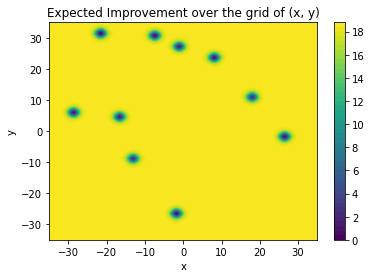

In [8]:
from scipy.stats import norm

# Define the expected improvement function
def expected_improvement(X, gp_model, best_y):
    y_pred, y_std = gp_model.predict(X, return_std=True)
    z = (y_pred - best_y) / y_std
    ei = (y_pred - best_y) * norm.cdf(z) + y_std * norm.pdf(z)
    return ei

# Determine the point with the highest observed function value
best_idx = np.argmax(y_train)
best_x = X_train[best_idx]
best_y = y_train[best_idx]

# Create a grid of (x, y) points
x_grid, y_grid = np.meshgrid(x, y)
grid_points = np.vstack((x_grid.ravel(), y_grid.ravel())).T

# Calculate expected improvement over the grid
ei = expected_improvement(grid_points, gp_model, best_y)
ei_grid = ei.reshape(x_grid.shape)

# Plot the expected improvement
plt.figure()
plt.contourf(x_grid, y_grid, ei_grid, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Expected Improvement over the grid of (x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [9]:
# Create empty lists to store the coordinate points and EI values
points = []
ei_values = []

# Iterate over the grid of (x, y) points and calculate EI
for i in range(len(x)):
    for j in range(len(y)):
        x_val = x[i]
        y_val = y[j]
        ei_val = ei_grid[j, i]  
        
        # Append the coordinate points and EI value to the lists
        points.append((x_val, y_val))
        ei_values.append(ei_val)

# Convert the lists to NumPy arrays for easier manipulation
points = np.array(points)
ei_values = np.array(ei_values)

# Print the coordinate points and EI values
for i in range(len(points)):
    print(f"Point: ({points[i, 0]}, {points[i, 1]}), EI: {ei_values[i]}")

Point: (-35.0, -35.0), EI: 18.558456739993115
Point: (-35.0, -34.292929292929294), EI: 18.558456739993115
Point: (-35.0, -33.58585858585859), EI: 18.558456739993115
Point: (-35.0, -32.878787878787875), EI: 18.558456739993115
Point: (-35.0, -32.17171717171717), EI: 18.558456739993115
Point: (-35.0, -31.464646464646464), EI: 18.558456739993115
Point: (-35.0, -30.757575757575758), EI: 18.558456739993115
Point: (-35.0, -30.050505050505052), EI: 18.558456739993115
Point: (-35.0, -29.343434343434343), EI: 18.558456739993115
Point: (-35.0, -28.636363636363637), EI: 18.558456739993115
Point: (-35.0, -27.929292929292927), EI: 18.558456739993115
Point: (-35.0, -27.22222222222222), EI: 18.558456739993115
Point: (-35.0, -26.515151515151516), EI: 18.558456739993115
Point: (-35.0, -25.80808080808081), EI: 18.558456739993115
Point: (-35.0, -25.1010101010101), EI: 18.558456739993115
Point: (-35.0, -24.393939393939394), EI: 18.558456739993115
Point: (-35.0, -23.686868686868685), EI: 18.558456739993115


In [11]:
# Find the index of the point with the maximum EI value
max_ei_index = np.argmax(ei_values)

# Get the coordinate point with the maximum EI value
max_ei_point = (points[max_ei_index, 0], points[max_ei_index, 1])

# Get the maximum EI value
max_ei_value = ei_values[max_ei_index]

# Output the point with the maximum EI value
print(f"Point with maximum EI: {max_ei_point}, EI value: {max_ei_value}")

Point with maximum EI: (-35.0, -35.0), EI value: 18.558456739993115
